<a href="https://colab.research.google.com/github/anandkumarprajapati/EDA-Hotel-Booking-Analysis-/blob/main/EDA_Hotel_booking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of required parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# import folium

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# import the csv file as a DataFrame
working_dir_path = '/content/drive/MyDrive/data science/Hotel Bookings.csv'
df = pd.read_csv(working_dir_path)

# Introduction Regarding the given Dataset

This data article describes two datasets with hotel demand data. One of the hotels (H1) is a Resort Hotel and the other is a City Hotel (H2). Both datasets share the same structure, with 31 variables describing the 40,060 observations of H1 and 79,330 observations of H2. Each observation represents a hotel booking. Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. Since this is hotel real data, all data elements pertaining hotel or costumer identification were deleted.

*Both Datasets H1 and H2 are combined to form this Dataset*

* **Data source location** --	Both hotels are located in Portugal: H1 at the resort region of Algarve and H2 at the city of Lisbon.

* Distance between Algarve(Faro) from Lisbon is 173 miles ( 280 km)

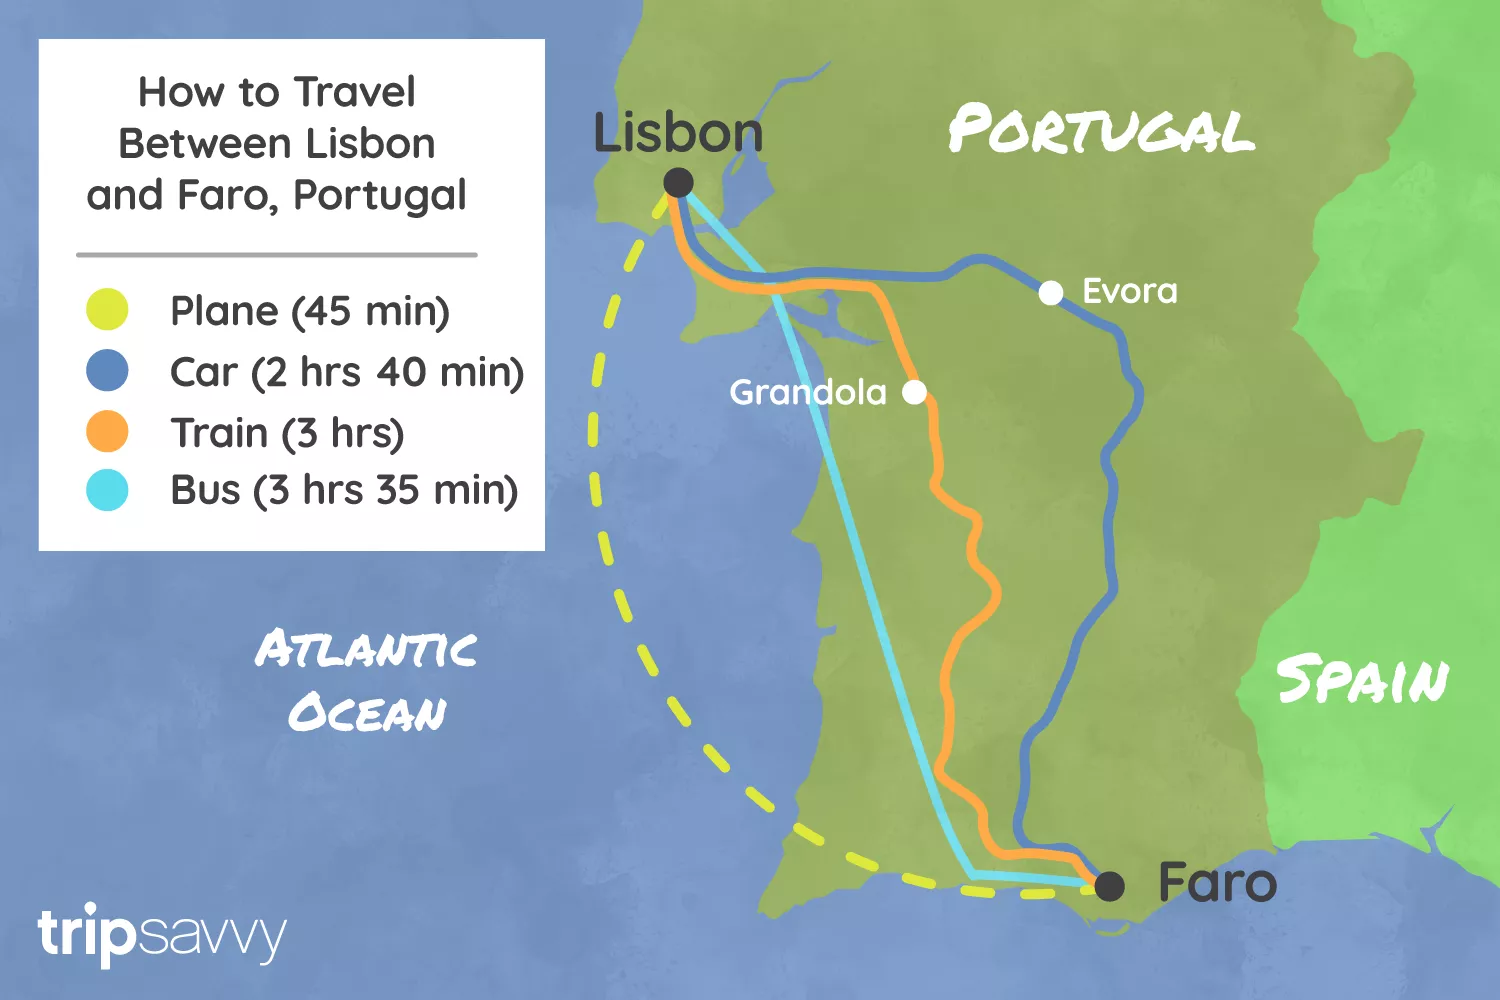

## Column Names and their meanings

* **hotel**: hotel type(H1 = Resort Hotel or H2 = City Hotel)
* **is_canceled**: Value indicating if the booking was canceled (1) or not (0)
* **lead_time**: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
* **arrival_date_year**: Year of arrival date
* **arrival_date_month**: Month of arrival date
* **arrival_date_week_number**: Week number of year for arrival date
* **arrival_date_day_of_month**: Day of arrival date
* **stays_in_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* **stays_in_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* **adults**: Number of adults
* **children**: Number of children
* **babies**: Number of babies
* **meal**: Type of meal booked. Categories are presented in standard hospitality  meal packages:  

  1.   Undefined/SC – no meal package
  2.   BB – Bed & Breakfast
  3.   HB – Half board (breakfast and one other meal – usually dinner)
  4.   FB – Full board (breakfast, lunch and dinner)

* **country**: Country of origin. Categories are represented in the ISO 3155–3:2013 format.
* **market_segment**: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
* **distribution_channel**: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
* **is_repeated_guest**: Value indicating if the booking name was from a repeated guest (1) or not (0)
* **previous_cancellations**: Number of previous bookings that were cancelled by the customer prior to the current booking
* **previous_bookings_not_canceled**: Number of previous bookings not cancelled by the customer prior to the current booking.
reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.
* **assigned_room_type**: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
* **booking_changes**: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.
* **deposit_type**: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: 
  1. No Deposit – no deposit was made 
  2. Non Refund – a deposit was made in the value of the total stay cost  
  3. Refundable – a deposit was made with a value under the total cost of stay.
* **agent**: ID of the travel agency that made the booking
* **company**: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons.
* **days_in_waiting_list**: Number of days the booking was in the waiting list before it was confirmed to the customer.
* **customer_type**: Type of booking, assuming one of four categories: 
  1. Contract - when the booking has an allotment or other type of contract associated to it 
  2. Group – when the booking is associated to a group 
  3. Transient – when the booking is not part of a group or contract, and is not associated to other transient booking 
  4. Transient-party – when the booking is transient, but is associated to at least other transient booking.
* **adr**: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.
(measures the average rental revenue earned for an occupied room per day. The operating performance of a hotel or other lodging business can be determined by using the ADR. Multiplying the ADR by the occupancy rate equals the revenue per available room.)
* **required_car_parking_spaces**: Number of car parking spaces required by the customer
* **total_of_special_requests**: Number of special requests made by the customer (e.g. twin bed or high floor)
* **reservation_status**: Reservation last status, assuming one of three categories: 
  1. Canceled – booking was canceled by the customer 
  2. Check-Out – customer has checked in but already departed 
  3. No-Show – customer did not check-in and did inform the hotel of the reason why.
* **reservation_status_date**: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel.

# Basic Data Inspection and Cleaning

In [ ]:
# top five rows
df.head()

In [ ]:
# bottom five rows
df.tail()

In [ ]:
# shape and size of the given data
print(f'the shape of the df is : {df.shape}') 
print(f'the size of the df is  : {df.size}')

In [ ]:
#  info regarding all rows
df.info()

In [ ]:
# dataset summary statistics (count,mean,std,min etc) – Integer and numeric variables.
df.describe().transpose()

In [ ]:
# find all the categorical features
#initialize empty list to store categorical features
discriptive_cols = []

#iterating through each features and checking its value type
#store each columns not having numeric values in discriptive_cols list
for col in list(df.columns):
  if col not in list(df.describe().columns):
    discriptive_cols.append(col)

In [ ]:
# dataset summary statistics – Categorical variables.
# transpose to interchange rows to columns and vice-versa
df[discriptive_cols].describe().transpose()

## **DATA CLEANING**

In [ ]:
#checking null values in each feature
df.isnull().sum()

In [ ]:
#get all columns having atleast 1 null value
null_values= df.isnull().sum().sort_values(ascending=False)
null_values[null_values>0]

In [ ]:
#make a copy of original dataframe
df2=df.copy() 

In [ ]:
#Dropping the Company column since it has more than 80 % Null Values 
df2.drop('company',inplace=True,axis=1)

In [ ]:
# fill Null values  in children and agents columns with median values
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
imputer.fit(df2[['children','agent']])
df2[['children','agent']]=imputer.transform(df2[['children','agent']])

In [ ]:
#For country take mode in place of Null values
df2['country'].fillna(str(df2['country'].mode().values[0]),inplace=True)

In [ ]:
#Checking the Null Values after cleaning 
null_values= df2.isnull().sum().sort_values(ascending=False)
null_values[null_values>0]

# **EDA**

In [ ]:
#function to get percentage of unique values in features
def get_percentage(Column,limit=None):

    Column = Column.value_counts()[:limit]
    
    #get index of column
    x = Column.index
    
    #percentage of unique values in column
    y = Column/Column.sum()*100
    
    #return x,y values respectively
    return x.values,y.values

In [ ]:
# distribution percentage of hotel
values,percentage = get_percentage(df2['hotel'])

#setting figure size
plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid",font='sans-serif')

#plot bar chart for booking distribution among hotels
ax = sns.barplot(x=values,y= percentage,data=df2)
plt.xlabel("Hotel type ", fontsize=12)
plt.ylabel("% Bookings", fontsize=12)
plt.title("Bookings Distribution ", fontsize=20)

In [ ]:
#get required data to plot pie chart for booking percentage in hotels
labels = df2['hotel'].value_counts().index.tolist()
sizes = df2['hotel'].value_counts().tolist()

#set figure size and theme
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid",font='sans-serif')
explode = (0, 0.1)

#booking percentage in hotels pie chart
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 10})
plt.title("Bookings Distribution ", fontsize=20)
plt.show()



## **Cancellation analysis**


In [ ]:
# is_canceled Bar Plot
# plt.figure(figsize=(5,2))
cancelled_df = df2['is_canceled'].value_counts().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x=['not cancelled', 'cancelled'], y=cancelled_df['is_canceled']).set_title('Booked Vs Canceled', fontsize= '20')
sns.set_theme(style="darkgrid",font='sans-serif')
plt.xlabel('Status', fontsize='15')
plt.ylabel('Total count', fontsize='15')

In [ ]:
#filter not cancelled bookings
df_not_canceled = df2[df2['is_canceled'] == 0]

#filter cancelled bookings
df_is_canceled = df2[df2['is_canceled'] == 1]

#cancelled bookings in each hotel
series= df_is_canceled['hotel'].value_counts()
hotel_type = series.index

#percentage of cancelled booking in hotels
count_percent_cancellation = series.values/series.values.sum()*100

In [ ]:
# distribution percentage of hotel which saw cancellations 
plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid",font='sans-serif')

#plot bar chart for cancellation percentage in hotels
ax = sns.barplot(x=hotel_type,y=count_percent_cancellation)
plt.ylabel("% Cancellation", fontsize=12)
plt.xlabel("Type of Hotel", fontsize=12)
plt.title("Cancellation Distribution ", fontsize=20)

In [ ]:
#cancellation in hotel type
# 0 - not cancelled, 1- is cancelled
#plot bar chart to compare cancelled and not canecelled booking in hotels
plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid",font='sans-serif')
ax = sns.countplot(x="is_canceled", hue ='hotel',data=df2)
plt.xlabel("cancellation", fontsize=12)
plt.ylabel("No. of Hotels", fontsize=12)
plt.title(" Bookings and Cancellation Distribution/ Hotel Type ", fontsize=20)

In [ ]:
#plot bar chart for monthly cancellations 
new_order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_cancellation = df2.groupby("arrival_date_month")["is_canceled"].sum()
monthly_cancellation = monthly_cancellation.reindex(new_order)
monthly_cancellation

plt.figure(figsize=(15,8))
ax= monthly_cancellation.plot.bar(rot=50)
plt.xlabel("Month",fontsize=12)
plt.ylabel("cancellations",fontsize=12)
plt.ylabel("No. of Hotels", fontsize=12)
plt.title("Cancellation Distribution/ Month ", fontsize=20)
plt.show()

In [ ]:
#plot Density Lead Time
plt.figure(figsize=(15,8))
sns.distplot(df['lead_time']).set_title('Density plot for Lead Time', fontsize=20)
sns.set_theme(style="darkgrid",font='sans-serif')
plt.xlabel('Lead Time', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

Density plot for lead time Graph is positively skewed, and most of the values lies between 0-50, which restricted the mean value to 104.

In [ ]:
# cancelled bookings statistical summary
df10=df[df['is_canceled']==1]['lead_time'].describe().reset_index().rename(columns={'lead_time':'lead_time when booking canceled'})
df20=df[df['is_canceled']==0]['lead_time'].describe().reset_index().rename(columns={'lead_time':'lead_time when not cancelled'})
lead_time_df = pd.merge(df10,df20,how='outer', on='index')

lead_time_df['Percent change']=(lead_time_df['lead_time when booking canceled']-lead_time_df['lead_time when not cancelled'])/lead_time_df['lead_time when not cancelled']*100
lead_time_df
# We can see that mean lead time for cancelled booking was 90% higher than not cancelled
# Which leads to the conclusion that people who booked hotels more than 4 months prior have more chances of getting cancelled than hotels booked within a month. 

In [ ]:
#plot graph for Lead time density distribution when bookings were cancelled
plt.figure(figsize=(15,8))
sns.distplot(df2[df2['is_canceled']==1]['lead_time']).set_title('Lead time density distribution when bookings were cancelled', fontsize=20)
sns.set_theme(style="darkgrid",font='sans-serif')
plt.xlabel('Lead Time', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(df2[df2['is_canceled']==0]['lead_time']).set_title('Lead time density distribution when bookings were cancelled', fontsize=20)
sns.set_theme(style="darkgrid",font='sans-serif')
plt.xlabel('Lead Time', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

# After analyzing both density distribution we can see that lead time of cancelled bookings was more scattered than bookings which were not cancelled.

In [ ]:
# depicting groups of Cancellation through their quartiles using boxplot
plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid",font='sans-serif')
plt.title("Cancellation and Lead time", fontsize=20)
sns.boxplot(x='is_canceled',y='lead_time',data=df2)

In [ ]:
# get stastistical summary of lead time w.r.t cancelled bookings
lead_time_df = df2.groupby('lead_time')['is_canceled'].describe()
plt.figure(figsize=(12, 8))

# plot correlation b/w lead time w.r.t cancelled booking
sns.regplot(x=lead_time_df.index, y=lead_time_df["mean"].values * 100)
plt.title("Correlation of Lead Time wrt Cancellations", fontsize=14)
plt.xlabel("Lead time", fontsize=14)
plt.ylabel("Cancelation Percentage", fontsize=14)
plt.xlim(0,600)
plt.ylim(0,100)

In [ ]:
# barplot for booking Distribution Channel w.r.t cancelled bookings
plt.figure(figsize=(15, 8))
ax=sns.barplot(x="distribution_channel", y="is_canceled", hue="hotel", data=df2 , errwidth=0)
plt.xlabel('Distribution Channel')
plt.ylabel('% Cancellations')
plt.show()

In [ ]:
# Barplot for Market Segment w.r.t to cancelled bookings
plt.figure(figsize=(15, 8))
ax=sns.barplot(x="market_segment", y="is_canceled", hue="hotel", data=df2,errwidth=0)
plt.xlabel('count')
plt.ylabel('is_canceled count')
plt.show()

In [ ]:
# Plot deposit type leading in cancelleation

# get stastistical summary of Deposite Type w.r.t cancelled booking
df_deposit_type = df_is_canceled.groupby('deposit_type')['is_canceled'].describe()
df_deposit_type

plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid",font='sans-serif')

# BarPlot deposit type leading in cancelleation
ax = sns.barplot(df_deposit_type.index, df_deposit_type["count"].values)
plt.title("Effect of deposit on cancelation", fontsize=20)
plt.xlabel("Deposit Type", fontsize=12)
plt.ylabel("Cancelations Mean", fontsize=12)

## **Monthly Trends**

In [ ]:
# Plot Montly Bookings Percentage  

# month list
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

#sorted arrival months
sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(new_order)

different_months = sorted_months.index
montly_bookings_percentage = sorted_months/sorted_months.sum()*100

plt.figure(figsize=(20,5))
sns.set_theme(style="darkgrid",font='sans-serif')

# Draw Montly  linePlot Bookings Percentage
ax =sns.lineplot(x=different_months,y=montly_bookings_percentage,)
plt.ylabel("% Bookings", fontsize=12)
plt.xlabel("Months", fontsize=12)
plt.title(" Montly Bookings Percentage  ", fontsize=20)



In [ ]:
## Select only City Hotel
sorted_months = df_not_canceled.loc[df.hotel=='City Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100

## Select only Resort Hotel
sorted_months = df_not_canceled.loc[df.hotel=='Resort Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x2 = sorted_months.index
y2 = sorted_months/sorted_months.sum()*100

## Draw the line plot
sns.set_theme(style="darkgrid",font='sans-serif')
fig, ax = plt.subplots(figsize=(20,5))
ax.set_xlabel('Months',fontsize=12)
ax.set_ylabel('Booking (%)', fontsize=12)
ax.set_title('Booking Trend (Monthly)', fontsize=20)
sns.lineplot(x1, y1.values, label='City Hotel', sort=False)
sns.lineplot(x1, y2.values, label='Resort Hotel', sort=False)
plt.show()

In [ ]:
# Compare arrival months w.r.t to hotels using barPlot

plt.figure(figsize=(20,5)) 
sns.set_theme(style="darkgrid",font='sans-serif')
ax =sns.countplot(data = df2, x = 'arrival_date_month', hue = 'hotel', order =new_order)
plt.ylabel("Counts", fontsize=12)
plt.xlabel("Months", fontsize=12)
plt.title("Number of arrivals per month/Hotel",fontsize=20)


## **Yearly Trend**

In [ ]:
#  Arrival date year bar plot
plt.figure(figsize=(12,8))
sns.set_theme(style="darkgrid",font='sans-serif')
sns.countplot(data=df, x='arrival_date_year', hue='hotel').set_title('Bookings as per year', fontsize=20)
plt.xlabel('Arrival Year', fontsize=15)
plt.ylabel('No. of bookings', fontsize=15)

## **Duration of stay**

In [ ]:
# total night stays
df_not_canceled.loc[:,'total_nights'] = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']
plt.figure(figsize=(20,5))

#plot top 10 Hotel wise night stays
ax=sns.countplot(x='total_nights', hue='hotel', data=df_not_canceled, order = df_not_canceled.total_nights.value_counts(sort=True).iloc[:10].index)
plt.xlabel('No of Nights',fontsize=12)
plt.ylabel('Counts',fontsize=12)
plt.title('Hotel wise night stay duration (Top 10)',fontsize=20)


In [ ]:
sns.set_theme(style="darkgrid",font='sans-serif')
plt.figure(figsize=(15, 8))

# plot hotel wise stays in weekday nights
plt.subplot(1, 2, 1)
ax=sns.countplot(x='stays_in_week_nights',hue='hotel', data=df2, order = df2.stays_in_week_nights.value_counts(sort=True).iloc[:10].index)
plt.ylabel("Counts", fontsize=12)
plt.xlabel("Duration of Stay", fontsize=12)
plt.title("Number of stays on weekday nights",fontsize=20)

# plot comparison b/w hotel wise weekday stays and cancellation 
plt.subplot(1, 2, 2)
ax=sns.countplot(data = df2, x = 'stays_in_week_nights', hue='is_canceled',order = df2.stays_in_week_nights.value_counts(sort=True).iloc[:10].index)
plt.ylabel("Counts", fontsize=12)
plt.xlabel("Duration of Stay", fontsize=12)
plt.title('weekday vs cancelation',fontsize=20)

plt.subplots_adjust(right=1.5)
plt.show()

In [ ]:
sns.set_theme(style="darkgrid",font='sans-serif')
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
ax=sns.countplot(x='stays_in_weekend_nights',hue='hotel', data=df2, order = df2.stays_in_weekend_nights.value_counts(sort=True).iloc[:10].index)
plt.ylabel("Counts", fontsize=12)
plt.xlabel("Duration of Stay", fontsize=12)
plt.title("Number of stays on weekend nights", fontsize=20)

plt.subplot(1, 2, 2)
ax=sns.countplot(data = df2, x = 'stays_in_weekend_nights', hue='is_canceled', order = df2.stays_in_weekend_nights.value_counts(sort=True).iloc[:10].index)
plt.ylabel("Counts", fontsize=12)
plt.xlabel("Duration of Stay", fontsize=12)
plt.title('WeekendStay vs Cancelation', fontsize=20)
plt.subplots_adjust(right=1.5)

plt.show()

In [ ]:
sns.set_theme(style="darkgrid",font='sans-serif')
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
ax=sns.countplot(x='adults',hue='hotel', data=df2)
plt.ylabel("Counts", fontsize=12)
plt.xlabel("Duration of Stay", fontsize=12)
plt.title("Number of adults in both hotels",fontsize=20)

plt.subplot(1, 2, 2)
ax= sns.countplot(data = df2, x = 'adults', hue='is_canceled')
plt.ylabel("Counts", fontsize=12)
plt.xlabel("Duration of Stay", fontsize=12)
plt.title('Adults vs Cancelations',fontsize=20)

plt.subplots_adjust(right=1.7)
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
ax=sns.countplot(x='children',hue='hotel', data=df2)
plt.ylabel("Counts", fontsize=12)
plt.xlabel("Duration of Stay", fontsize=12)
plt.title("Number of children in both hotels",fontsize=20)

plt.subplot(1, 2, 2)
ax=sns.countplot(data = df2, x = 'children', hue='is_canceled')
plt.ylabel("Counts", fontsize=12)
plt.xlabel("Duration of Stay", fontsize=12)
plt.title('children vs cancelations',fontsize=20)

plt.subplots_adjust(right=1.7)
plt.show()

In [ ]:
df2["duration"]= df2['stays_in_weekend_nights']+df2['stays_in_week_nights']
plt.figure(figsize = (20,10))
ax=sns.boxplot(x = 'market_segment', y = 'duration', data = df2, hue = 'hotel');
plt.ylabel("Duration", fontsize=12)
plt.xlabel("Market_segment", fontsize=12)
plt.title('Duration /Market_segment ',fontsize=20)

plt.show()

## **Geographical Analysis**

In [ ]:
Countries,percetage_bookings=get_percentage(df_not_canceled['country'], limit=10)
plt.figure(figsize=(20,5))
ax=sns.barplot(x=Countries,y=percetage_bookings)
plt.ylabel("%Bookings", fontsize=12)
plt.xlabel("Country", fontsize=12)
plt.title("Country Wise Distribution of Bookings",fontsize=20)

In [ ]:
#Graphing booking data by country of origin

country_visitors = df_not_canceled.groupby('country').size().reset_index(name = 'count')

# We will be using Plotly.express to plot a choropleth map. 
import plotly.express as px


px.choropleth(country_visitors,
                    locations = "country",
                    color= np.log(country_visitors['count']), 
                    hover_name= "country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title="Home country of visitors")



## **ADR Analysis**

In [ ]:
#adr analysis
city_data = df2[df2["hotel"]=="City Hotel"]
resort_data = df2[df2["hotel"]=="Resort Hotel"]

In [ ]:
plt.figure(figsize=(15, 8))
ax=sns.distplot(city_data[city_data["adr"]<=1000]["adr"],bins=30)
plt.ylabel("Density", fontsize=12)
plt.xlabel("ADR", fontsize=12)
plt.title("ADR for City hotels",fontsize=20)

plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
ax=sns.distplot(resort_data[resort_data["adr"]<=1000]["adr"],bins=30)
plt.ylabel("Density", fontsize=12)
plt.xlabel("ADR", fontsize=12)
plt.title("ADR for Resort hotels",fontsize=20)

plt.show()

In [ ]:
#let's see monthly adr data
mon_city_adr = city_data.groupby("arrival_date_month")["adr"].describe()
mon_city_adr = mon_city_adr.reindex(new_order)
mon_city_adr



In [ ]:
plt.figure(figsize=(15, 8))
ax=sns.barplot(x=mon_city_adr["mean"],y=mon_city_adr.index,palette='muted')
plt.ylabel("Month", fontsize=12)
plt.xlabel("ADR", fontsize=12)
plt.title("ADR for City Hotels/ Month",fontsize=20)
plt.show()

In [ ]:
mon_resort_adr = resort_data.groupby("arrival_date_month")["adr"].describe()
mon_resort_adr = mon_resort_adr.reindex(new_order)
mon_resort_adr

In [ ]:
plt.figure(figsize=(15, 8))
ax=sns.barplot(x=mon_resort_adr["mean"],y=mon_resort_adr.index,palette='muted')
plt.ylabel("Month", fontsize=12)
plt.xlabel("ADR", fontsize=12)
plt.title("ADR for Resort Hotels/ Month",fontsize=20)
plt.show()


In [ ]:
plt.figure(figsize=(15, 8))
ax=sns.boxplot(x = 'reserved_room_type', y = 'adr',data=df_not_canceled,hue='hotel',width =1)
plt.ylabel("ADR", fontsize=12)
plt.xlabel("Room Type", fontsize=12)
plt.title("ADR for Room Types",fontsize=20)
plt.show()


## **Revenue Analysis**

In [ ]:
#revenue_analysis
df2["duration"]= df2['stays_in_weekend_nights']+df2['stays_in_week_nights']
df2["duration"]


In [ ]:
df2["revenue"] = df2["adr"]*df2["duration"]
city_data = df2[df2["hotel"]=="City Hotel"]
resort_data = df2[df2["hotel"]=="Resort Hotel"]

In [ ]:
city_data["revenue"].describe()

In [ ]:
city_data["revenue"].sum()

In [ ]:
mon_city_rev = city_data.groupby("arrival_date_month").sum()["revenue"]
mon_city_rev = mon_city_rev.reindex(new_order)
mon_city_rev

In [ ]:
plt.figure(figsize=(15, 8))
ax=mon_city_rev.plot.bar()
plt.ylabel("Revenue", fontsize=12)
plt.xlabel("Months", fontsize=12)
plt.title("Revenue for City Hotel/ Month",fontsize=20)
plt.show()



In [ ]:
city_roi = city_data.groupby("distribution_channel").sum()["revenue"]
city_roi

In [ ]:
plt.figure(figsize=(8, 8))
ax=city_roi.plot.bar()
plt.ylabel("Revenue", fontsize=12)
plt.xlabel("Distribtuion Channel", fontsize=12)
plt.title("Revenue for City Hotel/ Distribtuion Channel",fontsize=20)
plt.show()


In [ ]:
mon_resort_rev = resort_data.groupby("arrival_date_month").sum()["revenue"]
mon_resort_rev = mon_resort_rev.reindex(new_order)
mon_resort_rev

In [ ]:
plt.figure(figsize=(15, 8))
ax= mon_resort_rev.plot.bar()
plt.ylabel("Revenue", fontsize=12)
plt.xlabel("Months", fontsize=12)
plt.title("Revenue for Resort Hotel/ Month",fontsize=20)
plt.show()

In [ ]:
resort_roi = resort_data.groupby("distribution_channel").sum()["revenue"]
resort_roi

In [ ]:
plt.figure(figsize=(8, 8))
ax=resort_roi.plot.bar()
plt.ylabel("Revenue", fontsize=12)
plt.xlabel("Distribtuion Channel", fontsize=12)
plt.title("Revenue for Resort Hotel/ Distribtuion Channel",fontsize=20)
plt.show()


## **Customer Analysis**

**Demographics** </h3>

Assumptions made:<br>
Single - 1 Adult, 0 Children , 0 Babies<br>
Couple - 2 Adult, 0 Children , 0 Babies<br>
Family - Adult + Children + Babies = 3 or greater than 3<br>


In [ ]:
bookings = df2[df2['is_canceled']==0].shape[0]
single = df2[df2['is_canceled']==0][(df2['adults']==1) & (df2['children'] == 0) & (df2['babies'] == 0)]
couple = df2[df2['is_canceled']==0][(df2['adults']==2) & (df2['children'] == 0) & (df2['babies'] == 0)]
family = df2[df2['is_canceled']==0][(df2['adults']) + (df2['children']) + (df2['babies'] ) > 2]

In [ ]:
df2[df2['is_canceled']==0].shape[0]

In [ ]:
list_type = [single,couple,family]
accomodation_type = ['Single','Couple','Family']
percentage = []
for val in list_type:
  percentage.append(round(len(val)*100/bookings))
#percentage
#dict_ = {"Accomodation Type":accomodation_type, "Accomodaation percentage":percentage}
df_accomodation_percent =pd.DataFrame({"Accomodation_Type":accomodation_type, "Accomodation_percentage":percentage})
df_accomodation_percent

In [ ]:
plt.figure(figsize=(8,8))                   
sns.set_theme(style="darkgrid",font='sans-serif')
ax = sns.barplot(x="Accomodation_Type", y="Accomodation_percentage", data = df_accomodation_percent).set_title('Accomodation-Demographics', fontsize=20)

Summary:<br>
From the Bar plot we can say that **Couple books Most No. of Hotels** and **Family books Least No. of Hotels**

**Customer Type**

In [ ]:
#graph types of guests
plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid",font='sans-serif')
ax =sns.countplot(data = df, x = 'customer_type',hue='hotel')
plt.xlabel("Counts ", fontsize=12)
plt.ylabel("Types", fontsize=12)
plt.title("Types of guests", fontsize=20)


**Repeated Guests**

In [ ]:
#distribution of repeated guest hotel wise

series=df_not_canceled.groupby('hotel')["is_repeated_guest"].count()
hotel_type=series.index
count_percent_repeated_guest=series.values/series.values.sum()*100

plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid",font='sans-serif')
ax = sns.barplot(x=hotel_type,y=count_percent_repeated_guest)
plt.ylabel("% Repeated Guests ", fontsize=12)
plt.xlabel("Type of Hotel", fontsize=12)
plt.title(" Repeated Guests / Hotel Type ", fontsize=20)


In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x = "arrival_date_month", y="is_repeated_guest", hue="hotel", data=df2, ci=None).set_title('Repeated Guest/ Months', fontsize=20)
sns.set_theme(style="darkgrid",font='sans-serif')
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Repeated Guest', fontsize=12)
plt.show()

**Special Requests**

In [ ]:
plt.figure(figsize=(15, 8))
ax=sns.countplot(df2["total_of_special_requests"])
plt.ylabel("Counts", fontsize=12)
plt.xlabel("Types of special Requests", fontsize=12)
plt.title(" Counts of special Requests",fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid",font='sans-serif')
ax=sns.barplot(y= "total_of_special_requests", x= "reserved_room_type", data=df_not_canceled,errwidth=0)
plt.xlabel('count',fontsize=12)
plt.ylabel('special request count',fontsize=12)
plt.title(" Special Request/ Room Type ",fontsize=20)
plt.show()



In [ ]:
single.groupby('hotel')['total_of_special_requests'].sum().reset_index()
couple.groupby('hotel')['total_of_special_requests'].sum().reset_index()
family.groupby('hotel')['total_of_special_requests'].sum().reset_index()


In [ ]:
city_bar = [4212,22362,7330]
resort_bar = [1967, 14152, 3243]
width_bar = 0.25

range1 = np.arange(len(city_bar))
range2 = [val + width_bar for val in range1]

In [ ]:
plt.figure(figsize=(12,10))
plt.bar(range1, city_bar, width=width_bar, label='City Hotel')
plt.bar(range2, resort_bar, width=width_bar,label='Resort Hotel')
plt.xticks([val + width_bar for val in range(len(city_bar))], ['Single',' Couple','Family'])
plt.xlabel('Accomodation Type')
plt.ylabel('Special Request')
plt.legend(loc = 'best')
plt.show()

**Meals**

In [ ]:
plt.figure(figsize=(8, 8))
ax=sns.countplot(df2["meal"])
plt.ylabel("Counts", fontsize=12)
plt.xlabel("Types of Meals", fontsize=12)
plt.title(" Counts of Meals",fontsize=20)
plt.show()



**Booking Channels**

In [ ]:
#Most popular booking channel 
#Travel agents and tour operators are bring in most of the visitors 
plt.figure(figsize=(8, 8))
ax=sns.countplot(df2["distribution_channel"])
plt.ylabel("Counts", fontsize=12)
plt.xlabel("Types of Channels", fontsize=12)
plt.title(" Counts of Bookings/ Channel ",fontsize=20)
plt.show()




**Market Segment**

In [ ]:
#Most popular market segment 
#travel agents are most represented among our visitors as well 

plt.figure(figsize=(8, 8))
ax=sns.countplot(df2["market_segment"])
plt.xticks(rotation=50)
plt.ylabel("Counts", fontsize=12)
plt.xlabel("Types of Market Segments", fontsize=12)
plt.title(" Counts of Bookings/ Market Segments ",fontsize=20)
plt.show()





**`Lead Time `**

In [ ]:
#lead time for booking 

plt.figure(figsize=(15, 8))
ax=sns.distplot(df2['lead_time'],bins=30)
plt.ylabel("Density ", fontsize=12)
plt.xlabel("Lead Time", fontsize=12)
plt.title("Lead Time Analysis ",fontsize=20)
plt.show()


**Deposit Type**

In [ ]:
#graphing deposit types
plt.figure(figsize=(8, 8))
ax=sns.countplot(data = df2, x = 'deposit_type', hue='hotel')
plt.ylabel("Count", fontsize=12)
plt.xlabel("Depostits", fontsize=12)
plt.title("Types of deposits ",fontsize=20)
plt.show()
